In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [282]:
y_train = np.genfromtxt("y_train.csv", delimiter=",")
features_train = np.genfromtxt("x_train.csv", delimiter=",")
features_test = np.genfromtxt("x_test.csv", delimiter=",")
sample = np.genfromtxt("sample.csv", delimiter=",")

In [283]:
y_train.shape

(1213, 2)

In [284]:
y_train

array([[      nan,       nan],
       [0.000e+00, 7.100e+01],
       [1.000e+00, 7.300e+01],
       ...,
       [1.209e+03, 8.200e+01],
       [1.210e+03, 7.600e+01],
       [1.211e+03, 8.100e+01]])

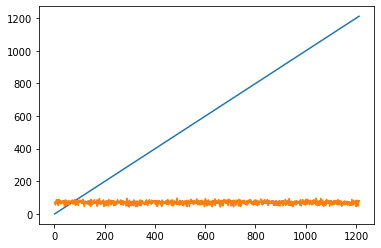

In [170]:
plt.plot(y_train)

In [171]:
np.nanmin(y_train, axis = 0)

array([ 0., 42.])

In [172]:
np.nanmean(y_train, axis= 0)

array([605.5       ,  69.66584158])

In [173]:
np.nanmax(y_train, axis = 0)

array([1211.,   97.])

In [174]:
features_train.shape

(1213, 833)

In [175]:
np.histogram(y_train[~np.isnan(y_train)], density=True)

(array([0.00454443, 0.0004122 , 0.0004122 , 0.0004122 , 0.0004122 ,
        0.0004122 , 0.0004122 , 0.0004122 , 0.0004122 , 0.00041561]),
 array([   0. ,  121.1,  242.2,  363.3,  484.4,  605.5,  726.6,  847.7,
         968.8, 1089.9, 1211. ]))

### We try replacing the missing values by the mean of each feature: ###

In [190]:
#For the training set
featureColsMeans = np.nanmean(features_train, axis= 0)
inds = np.where(np.isnan(features_train)) 
features_train[inds] = np.take(featureColsMeans, inds[1])
#features_train

In [191]:
#For the test set
featureColsMeansTest = np.nanmean(features_test, axis= 0)
indsTest = np.where(np.isnan(features_test)) 
features_test[indsTest] = np.take(featureColsMeansTest, indsTest[1])
#features_test

In [204]:
features_train2 = np.genfromtxt("x_train.csv", delimiter=",")
df2 = pd.DataFrame(data=features_train2)
df1 = pd.DataFrame(data=features_train)
numberNaN = np.count_nonzero(np.isnan(features_train2))
print("there are this much NaN:" + str(numberNaN))
print("from the size "+ str(1213*833)+ " array.")
print("this is a " + str(numberNaN/(1213*833))+ "%")

there are this much NaN:77743
from the size 1010429 array.
this is a 0.07694058662211793%


In [195]:
features_train.shape

(1213, 833)

In [193]:
import datacompy

compare = datacompy.Compare(
df1,
df2,
on_index=True,  #You can also specify a list of columns eg ['policyID','statecode']
abs_tol=0, #Optional, defaults to 0
rel_tol=0, #Optional, defaults to 0
df1_name='Original', #Optional, defaults to 'df1'
df2_name='New' #Optional, defaults to 'df2'
)
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0  Original      833  1213
1       New      833  1213

Column Summary
--------------

Number of columns in common: 833
Number of columns in Original but not in New: 0
Number of columns in New but not in Original: 0

Row Summary
-----------

Matched on: index
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 1,213
Number of rows in Original but not in New: 0
Number of rows in New but not in Original: 0

Number of rows with some compared columns unequal: 1,213
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 833
Number of columns compared with all values equal: 0
Total number of values which compare unequal: 77,743

Columns with Unequal Values or Types
------------------------------------

    Column Original dtype New dtype  # Unequal  M

### Now let's try catching the outliers. We will use the Isolation Forest method ###

In [214]:
features_train[:,0].shape

(1213,)

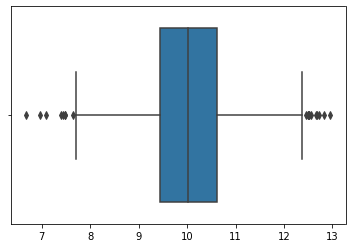

In [220]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
sns.boxplot(x=features_train[:,1])

In [246]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=10)
clf.fit(features_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples=10, n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

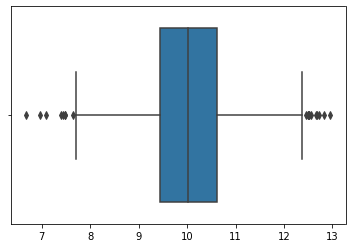

In [247]:
sns.boxplot(x=features_train[:,1])

In [248]:
features_trainNO = clf.predict(features_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [285]:
np.savetxt("features_trainNO.csv", features_trainNO, delimiter=",")

In [252]:
unique, counts = np.unique(features_trainNO, return_counts=True)
dict(zip(unique, counts))

{-1: 122, 1: 1091}

In [258]:
counts[1]

1091

In [274]:
newSize =  counts[1]
features_train_clean = np.zeros(shape=(newSize, 833) )
y_train_clean = np.zeros(shape=(newSize,2) )


for i in range(0,features_trainNO.shape[0]):
    if (features_trainNO[i] == 1):
        features_train_clean[counts[1] - newSize] = features_train[i]
        y_train_clean[counts[1] - newSize] = y_train[i]
        newSize -= 1


In [278]:
y_train

array([[      nan,       nan],
       [0.000e+00, 7.100e+01],
       [1.000e+00, 7.300e+01],
       ...,
       [1.209e+03, 8.200e+01],
       [1.210e+03, 7.600e+01],
       [1.211e+03, 8.100e+01]])

In [281]:
y_train_clean

array([[      nan,       nan],
       [0.000e+00, 7.100e+01],
       [1.000e+00, 7.300e+01],
       ...,
       [1.208e+03, 4.800e+01],
       [1.209e+03, 8.200e+01],
       [1.211e+03, 8.100e+01]])

In [269]:
np.savetxt("x_trainIF.csv", features_train_clean, delimiter=",")

In [271]:
features_train_clean2 = np.genfromtxt("x_trainIF.csv", delimiter=",")
features_train_clean2.shape

(1091, 833)

In [280]:
np.savetxt("y_trainIF.csv", y_train_clean, delimiter=",")